<h2><b>Predicting weekly sales forecast - WALMART</b></h2>

<i><b>Mounting google drive to google colab<b></i>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h2>About the dataset</h2>

This is the historical training data, which covers to **2010-02-05 to 2012-11-01**. Within this file you will find the following fields:

**Store** - the store number<br>
**Dept** - the department number<br>
**Date** - the week<br>
**Weekly_Sales** -  sales for the given department in the given store<br>
**IsHoliday** - whether the week is a special holiday week

<i>**Loading the data from drive and reading it with pandas**</i>

In [ ]:
from pandas import read_csv
import pandas as pd
data_load = '/content/drive/My Drive/Data Mining Assignment/train.csv';

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df_features = pd.read_csv('/content/drive/My Drive/Data Mining Assignment/features.csv', sep=',')
df_stores = pd.read_csv('/content/drive/My Drive/Data Mining Assignment/stores.csv', sep=',')

df_features_stores = df_features.merge(df_stores, how='inner', on='Store')
df_features_stores.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/Data Mining Assignment/train.csv', sep=',')
train = df_train.merge(df_features_stores, how='inner', on=['Store','Date','IsHoliday'])
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/Data Mining Assignment/test.csv', sep=',')
test = df_test.merge(df_features_stores, how='inner', on=['Store','Date','IsHoliday'])
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [ ]:
print("Min date value in train set: ", train['Date'].min())
print("Max date value in train set:", train['Date'].max())

print("Min date value in test set: ", test['Date'].min())
print("Max date value in test set:", test['Date'].max())

Min date value in train set:  2010-02-05
Max date value in train set: 2012-10-26
Min date value in test set:  2012-11-02
Max date value in test set: 2013-07-26


Since the records are weekly, the "date" variable is converted to week of the year and year, as two new variables.

#Checking for number of stores and departments

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

train['Week'] = train['Date'].dt.isocalendar().week
test['Week'] = test['Date'].dt.isocalendar().week

train['Month'] = pd.to_datetime(train['Date']).dt.month
test['Month'] = pd.to_datetime(test['Date']).dt.month

train['Year'] = train['Date'].dt.isocalendar().year
test['Year'] = test['Date'].dt.isocalendar().year


In [ ]:
train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010


In [ ]:
test.describe()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
count,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,22.238207,44.339524,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733,136497.688921,23.050963,5.729855,2012.767182
std,12.809930,30.656410,18.724153,0.239442,10698.760716,8323.495014,13767.939313,7570.501545,19445.150745,41.239967,1.583427,61106.926438,15.750407,3.590331,0.422629
min,1.000000,1.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000,34875.000000,1.000000,1.000000,2012.000000
25%,11.000000,18.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000,93638.000000,10.000000,3.000000,2013.000000
50%,22.000000,37.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000,140167.000000,20.000000,5.000000,2013.000000
75%,33.000000,74.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000,202505.000000,30.000000,7.000000,2013.000000
max,45.000000,99.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,219622.000000,52.000000,12.000000,2013.000000


There's a lot of similarity between the test and training dataset

# Understanding the datasets

Data types present in training data

In [ ]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Week                    UInt32
Month                    int64
Year                    UInt32
dtype: object

In [ ]:
train['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

Converting the Type and IsHoliday value to integer for easy processing

In [ ]:
#for train set
train['Date'] = pd.to_datetime(train['Date'])
train['Type'] = train['Type'] .apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
train['IsHoliday'] = train['IsHoliday'].apply(lambda x: 1 if x == True else 0)

cols = train.columns.drop(['Date'])
train[cols] = train[cols].apply(pd.to_numeric, errors='coerce')

#for test set
test['Date'] = pd.to_datetime(test['Date'])
test['Type'] = test['Type'].apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
test['IsHoliday'] = test['IsHoliday'].apply(lambda x: 1 if x == True else 0)

cols = test.columns.drop(['Date'])
test[cols] = test[cols].apply(pd.to_numeric, errors='coerce')

<h3><b>HOLIDAYS</b></h3>

From the data provided by the challenge, it is possible to identify what these holidays are.

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 --> WEEK 6
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 --> WEEK 36
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 --> WEEK 47
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13 --> WEEK 52

We should note that there are no sales records on the laborday holiday at the test dataset, since the holiday is in September and the test runs until July.

In [ ]:
holiday_train = train[['Date','Week','Year','IsHoliday']]
#removing the rows where isHoliday is False (Meaning not a holiday week)
holiday_train = holiday_train.loc[holiday_train['IsHoliday']==True].drop_duplicates()

holiday_test = test[['Date','Week','Year','IsHoliday']]
holiday_test = holiday_test.loc[holiday_test['IsHoliday']==True].drop_duplicates()

holidays = pd.concat([holiday_train, holiday_test])
holidays

,Date,Week,Year,IsHoliday
73,2010-02-12,6,2010,1
2218,2010-09-10,36,2010,1
3014,2010-11-26,47,2010,1
3372,2010-12-31,52,2010,1
3800,2011-02-11,6,2011,1
5940,2011-09-09,36,2011,1
6731,2011-11-25,47,2011,1
7096,2011-12-30,52,2011,1
7527,2012-02-10,6,2012,1
9667,2012-09-07,36,2012,1


In order to have a clear picture about which holiday had what impact on the sales, we assign different numerical values to each of them<br>
0 - if it is not a holiday<br>
1 - if the holiday is SuperBowl<br>
2 - if the holiday is LaborDay<br>
3 - if the holiday is Thanksgiving<br>
4 - if the holiday is Christmas

In [ ]:
def holiday_type(x):
    if   (x['IsHoliday']== 1) & (x['Week']==6):
       return 1 #SuperBowl
    elif (x['IsHoliday']== 1) & (x['Week']==36):
       return 2 #LaborDay
    elif (x['IsHoliday']== 1) & (x['Week']==47):
       return 3 #Thanksgiving
    elif (x['IsHoliday']== 1) & (x['Week']==52):
       return 4 #Christmas
    else:
       return 0

In [ ]:
train['IsHoliday'] = train.apply(holiday_type, axis=1)
train['IsHoliday'].unique()


array([0, 1, 2, 3, 4])

In [ ]:
test['IsHoliday'] = test.apply(holiday_type, axis=1)
test['IsHoliday'].unique()

array([0, 3, 4, 1])

#Null values and Correlations - Exploratory Analysis



Let us take a look at the number of null values and compare it with the total number of values present in the dataset to identify how much of the data is missing.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  int64         
 15  Size          421

In [ ]:
test[["CPI"]] = test[["CPI"]].fillna(test[["CPI"]].mean())
test[["Unemployment"]] = test[["Unemployment"]].fillna(test[["Unemployment"]].mean())
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI                 0
Unemployment        0
Type                0
Size                0
Week                0
Month               0
Year                0
dtype: int64

It is observed that MarkDowns 1 to 5 have more than 64% of data missing in the dataset. Ideally, since more than 50% data is missing in these features it is recommended to eliminate them but the MarkDown values identify certain reduction in sales and imputing values for these features would be the prefered solution. 

We shall now take a look at the correlations between different features of the dataset to identify how related each feature is to each other using a correlation matrix. This can help us avoid multicollinearity. 

In [ ]:
corr = train[['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Year']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
Store,1.000000,0.024004,-0.085195,-0.000395,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.226410,-0.182881,0.001031,0.002997
Dept,0.024004,1.000000,0.148032,0.000906,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.003708,-0.002966,0.000882,0.003738
Weekly_Sales,-0.085195,0.148032,1.000000,0.012574,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.182242,0.243828,0.027673,-0.010111
IsHoliday,-0.000395,0.000906,0.012574,1.000000,-0.145214,-0.071144,-0.080354,0.491347,0.479801,-0.068367,-0.075207,-0.001313,0.010656,0.000580,0.000241,0.256332,-0.083070
Temperature,-0.050097,0.004437,-0.002312,-0.145214,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.042981,-0.058313,0.236276,0.065814
Fuel_Price,0.065290,0.003572,-0.000120,-0.071144,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,-0.029687,0.003361,-0.031140,0.779633
MarkDown1,-0.119588,-0.002426,0.085251,-0.080354,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.257427,0.345673,-0.198076,0.141332
MarkDown2,-0.035173,0.000290,0.024130,0.491347,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.067034,0.108827,-0.000995,-0.222109
MarkDown3,-0.031556,0.001784,0.060385,0.479801,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.037560,0.048913,0.196307,-0.319162
MarkDown4,-0.009941,0.004257,0.045414,-0.068367,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.108991,0.168196,-0.218477,0.126469


We can observe the following correlations in the above matrix:
1. Fuel_Price with Year - Strong correlation
2. MarkDown2 and MarkDown3 with  IsHoliday - Moderate correlations
3. MarkDown1 with MarkDown4 - Strong correlation
4. Type with Size - Strong correlation

We can see that Weekly Sales has a weak correlation with other features and it has highest correlation with Dept, Type and Size.

But we have already established that MarkDown 1 to 5 columns have more than missing values present so we are not looking at the relationships between them.

We shall be performing Multivariate Imputation for the following reasons:
1. A considerable amount of data is missing from multiple variables.
2. Features are not highly correlated and missing data is most probably not MCAR, so univariate imputation was ruled out.

In [ ]:
#multivariate imputation of training data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_y = train.copy(deep=True)
df_y['Date'] = pd.to_numeric(pd.to_datetime(df_y['Date']))

imp = IterativeImputer(max_iter=100, sample_posterior=True,tol=0.000001)
imp.fit(df_y)

y_res=imp.transform(df_y)

print(y_res)

[[1.0000000e+00 1.0000000e+00 1.2653280e+18 ... 5.0000000e+00
  2.0000000e+00 2.0100000e+03]
 [1.0000000e+00 2.0000000e+00 1.2653280e+18 ... 5.0000000e+00
  2.0000000e+00 2.0100000e+03]
 [1.0000000e+00 3.0000000e+00 1.2653280e+18 ... 5.0000000e+00
  2.0000000e+00 2.0100000e+03]
 ...
 [4.5000000e+01 9.5000000e+01 1.3512096e+18 ... 4.3000000e+01
  1.0000000e+01 2.0120000e+03]
 [4.5000000e+01 9.7000000e+01 1.3512096e+18 ... 4.3000000e+01
  1.0000000e+01 2.0120000e+03]
 [4.5000000e+01 9.8000000e+01 1.3512096e+18 ... 4.3000000e+01
  1.0000000e+01 2.0120000e+03]]


In [ ]:
#write the imputed dataframe to csv
import os
os.chdir('/content/drive/MyDrive/Assignment_DM')
#features_modified = pd.read_csv('/content/drive/My Drive/Assignment_DM/train_modified.csv', sep=',')
features_modified = pd.DataFrame(y_res,columns=['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Month', 'Year'])
# features_modified[2] = pd.to_datetime(features_modified[2])
features_modified['Date'] = pd.to_datetime(features_modified['Date'])
features_modified.to_csv('train_modified.csv', index = False, header = ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Month', 'Year'])

In [ ]:
# features_modified[2] = pd.to_datetime(features_modified[2])
features_modified['Date'] = pd.to_datetime(features_modified['Date'])
features_modified.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1.0,1.0,2010-02-05,24924.50,0.0,42.31,2.572,-3.779052e+04,1.548470e+06,2.860881e+06,9.726897e+05,-8.048164e+05,211.096358,8.106,3.0,151315.0,5.0,2.0,2010.0
1,1.0,2.0,2010-02-05,50605.27,0.0,42.31,2.572,-1.171117e+06,-1.289255e+06,-6.664306e+05,6.771782e+05,2.900822e+06,211.096358,8.106,3.0,151315.0,5.0,2.0,2010.0
2,1.0,3.0,2010-02-05,13740.12,0.0,42.31,2.572,5.165332e+06,-1.144698e+06,-1.033715e+06,1.664580e+06,-1.823560e+06,211.096358,8.106,3.0,151315.0,5.0,2.0,2010.0
3,1.0,4.0,2010-02-05,39954.04,0.0,42.31,2.572,1.782528e+06,-3.304684e+06,1.429181e+06,4.357675e+06,1.335146e+06,211.096358,8.106,3.0,151315.0,5.0,2.0,2010.0
4,1.0,5.0,2010-02-05,32229.38,0.0,42.31,2.572,-2.628623e+06,2.212122e+06,8.136702e+06,-5.625980e+06,2.117590e+06,211.096358,8.106,3.0,151315.0,5.0,2.0,2010.0


Similarly, we shall impute the test data using Multivariate Imputation so that we can predict values based on a model that we design upon the training data that we imputed above.

In [ ]:
df_test = test.copy(deep=True)
df_test['Date'] = pd.to_numeric(pd.to_datetime(df_test['Date']))

imp = IterativeImputer(max_iter=100, sample_posterior=True,tol=0.000001)
imp.fit(df_test)

y_imp=imp.transform(df_test)

print(y_imp)

[[1.0000000e+00 1.0000000e+00 1.3518144e+18 ... 4.4000000e+01
  1.1000000e+01 2.0120000e+03]
 [1.0000000e+00 2.0000000e+00 1.3518144e+18 ... 4.4000000e+01
  1.1000000e+01 2.0120000e+03]
 [1.0000000e+00 3.0000000e+00 1.3518144e+18 ... 4.4000000e+01
  1.1000000e+01 2.0120000e+03]
 ...
 [4.5000000e+01 9.5000000e+01 1.3747968e+18 ... 3.0000000e+01
  7.0000000e+00 2.0130000e+03]
 [4.5000000e+01 9.7000000e+01 1.3747968e+18 ... 3.0000000e+01
  7.0000000e+00 2.0130000e+03]
 [4.5000000e+01 9.8000000e+01 1.3747968e+18 ... 3.0000000e+01
  7.0000000e+00 2.0130000e+03]]


In [ ]:
#write the imputed dataframe to csv
import os
os.chdir('/content/drive/MyDrive/Assignment_DM')
#test_modified = pd.read_csv('/content/drive/My Drive/Assignment_DM/test_modified.csv', sep=',')
test_modified = pd.DataFrame(y_imp,columns=['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Month', 'Year'])

test_modified['Date'] = pd.to_datetime(test_modified['Date'])
test_modified.to_csv('test_modified.csv', index = False, header = ['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Month', 'Year'])

test_modified['Date'] = pd.to_datetime(test_modified['Date'])
test_modified.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1.0,1.0,2012-11-02,0.0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,3.0,151315.0,44.0,11.0,2012.0
1,1.0,2.0,2012-11-02,0.0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,3.0,151315.0,44.0,11.0,2012.0
2,1.0,3.0,2012-11-02,0.0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,3.0,151315.0,44.0,11.0,2012.0
3,1.0,4.0,2012-11-02,0.0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,3.0,151315.0,44.0,11.0,2012.0
4,1.0,5.0,2012-11-02,0.0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,3.0,151315.0,44.0,11.0,2012.0


In [ ]:
# plt.style.use("seaborn-colorblind")
# plt.figure(figsize = (20,10))

# plt.xlim = (features_modified.index[0], features_modified.index[-1])
# plt.ylim = ((features_modified['Weekly_Sales'].min()-1))
# # features_modified.plot(x='Date', y='Weekly_Sales')
# x = features_modified['Date']
# y = features_modified['Weekly_Sales']
# plt.plot(x, y, linewidth = '2')
# # plt.gcf().autofmt_xdate()
# # plt.plot(features_modified['Weekly_Sales'], data=features_modified, linewidth = 2)

# plt.show()

Lets see how each of the features in our dataset varies with time

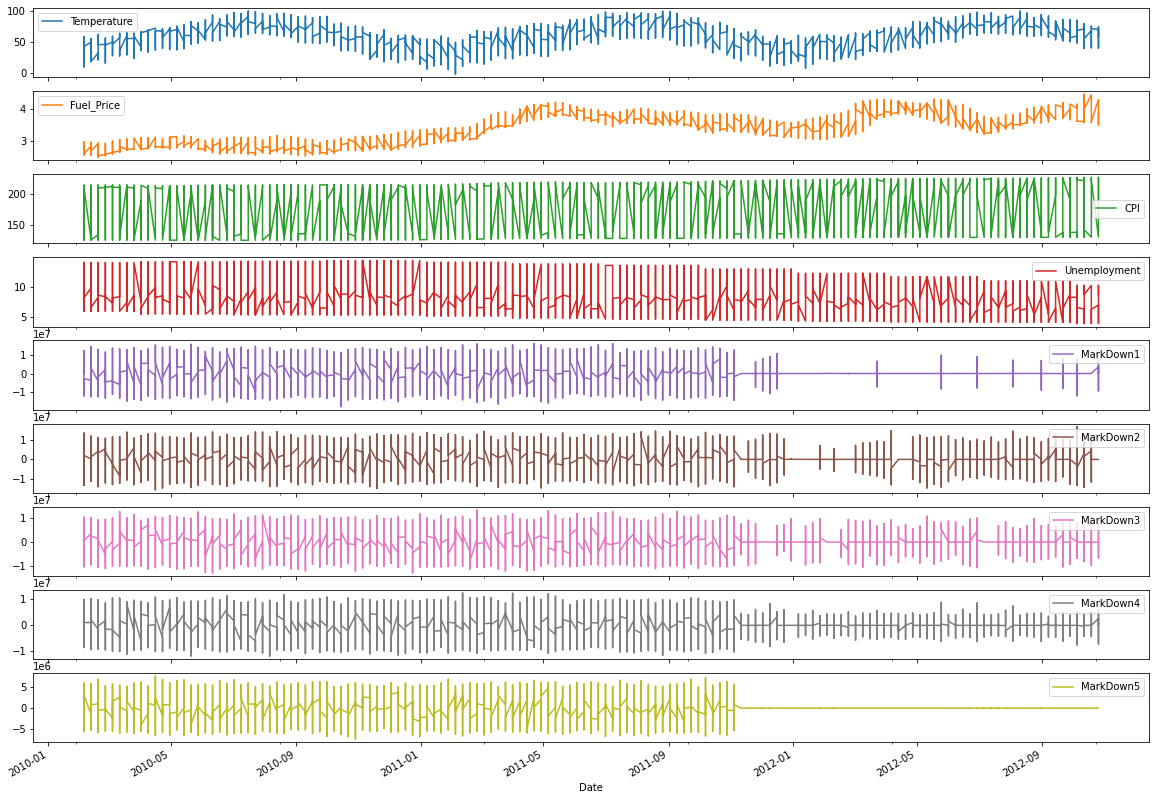

In [ ]:
features_modified[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))

plt.show()

Plotting details for Store and weekly sales here...

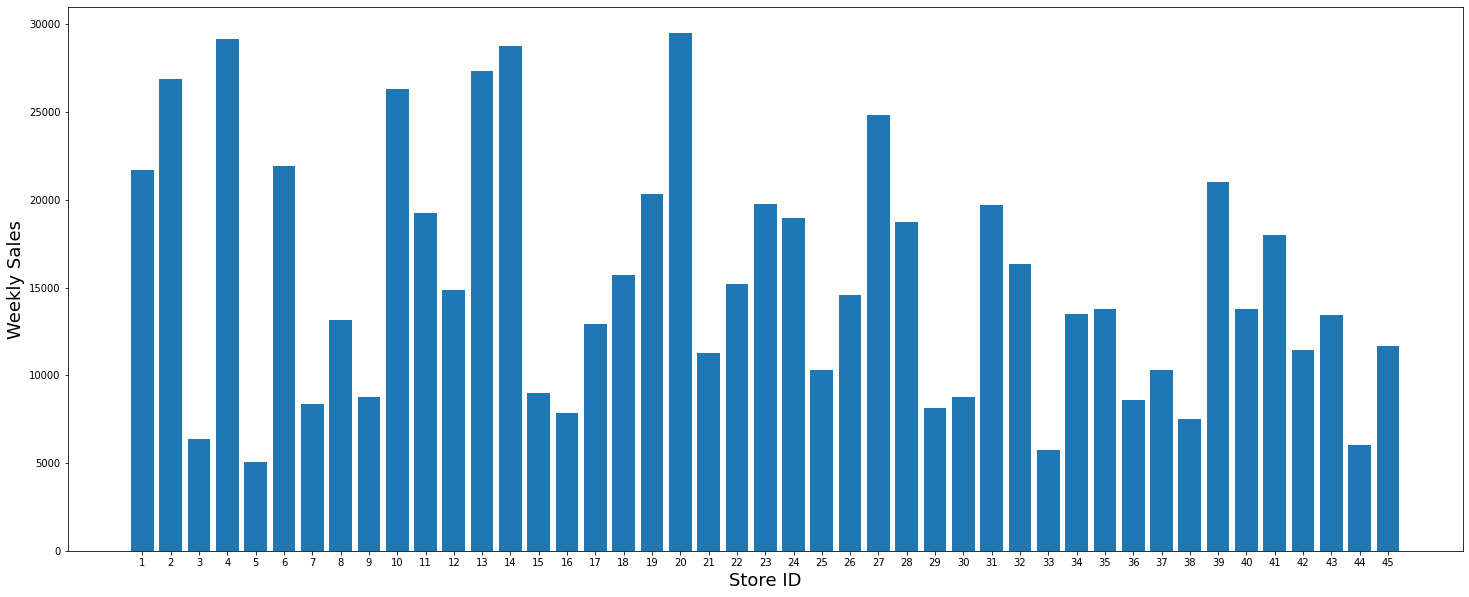

In [ ]:
stores_data = features_modified.groupby(['Store']).agg({'Weekly_Sales': ['mean']})

plt.figure(figsize=(25, 10))
plt.bar(stores_data.index,stores_data['Weekly_Sales']['mean'])

plt.xticks(np.arange(1, 46, step=1))

plt.ylabel('Weekly Sales', fontsize=18)
plt.xlabel('Store ID', fontsize=18)

plt.show()

Plotting details for Department wise weekly sales....

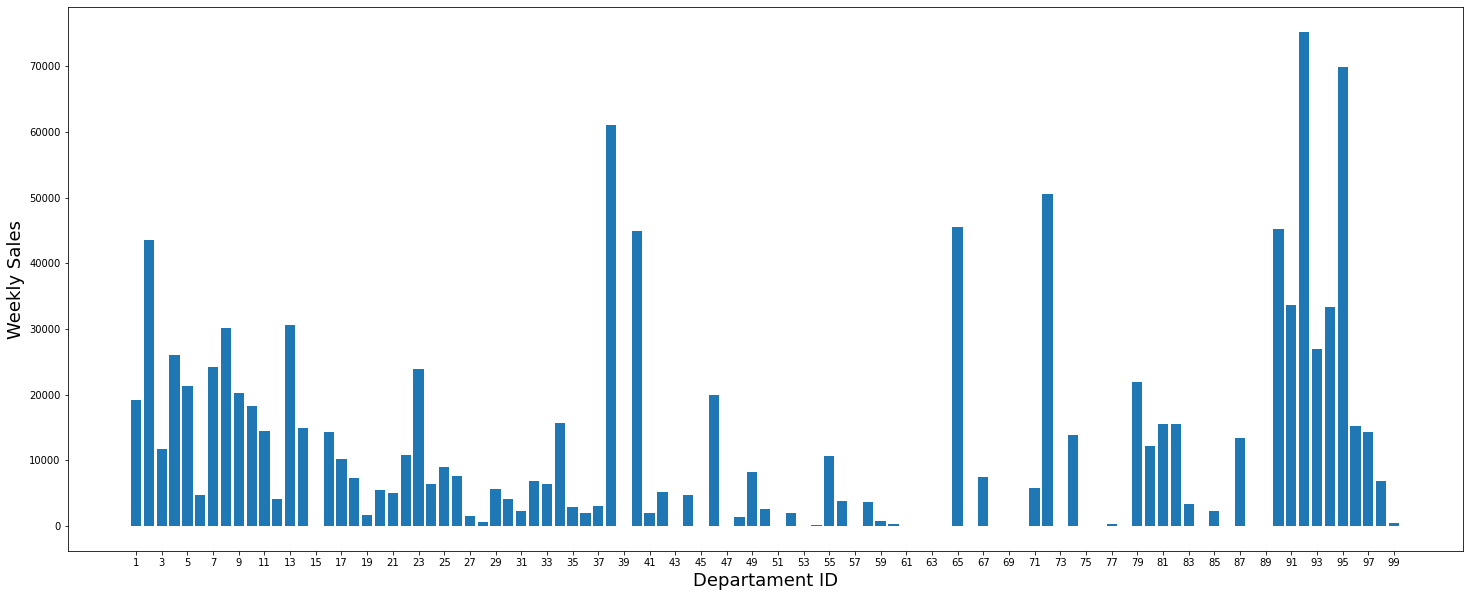

In [ ]:
dep_data = features_modified.groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(25, 10))
plt.bar(dep_data.index,dep_data['Weekly_Sales']['mean'])

plt.xticks(np.arange(1, 100, step=2))

plt.ylabel('Weekly Sales', fontsize=18)
plt.xlabel('Departament ID', fontsize=18)

plt.show()

Plotting details of Type and Weekly Sales....

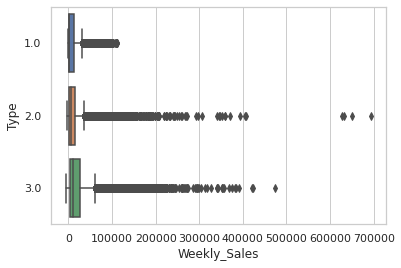

In [ ]:
# plt.figure(figsize=(25, 10))
# plt.boxplot(x = features_modified['Type'], y = features_modified['Weekly_Sales'])
sns.set_theme(style="whitegrid")
# data = sns.load_dataset("features_modified")
# ax = sns.boxplot(x="Type", y="Weekly_Sales", data=features_modified)
ax = sns.boxplot(x="Weekly_Sales", y="Type", data=features_modified, orient="h")


The weekly sales data are grouped by week and year in order to identify the average and median sales per week over the years. <br>
The mean values are well above the median, which indicates a high dispersion and variation in sales by stores and departments in a week.<br>
There is a certain pattern over the years, with high seasonality at the end of the year which can be seen in the graph below.

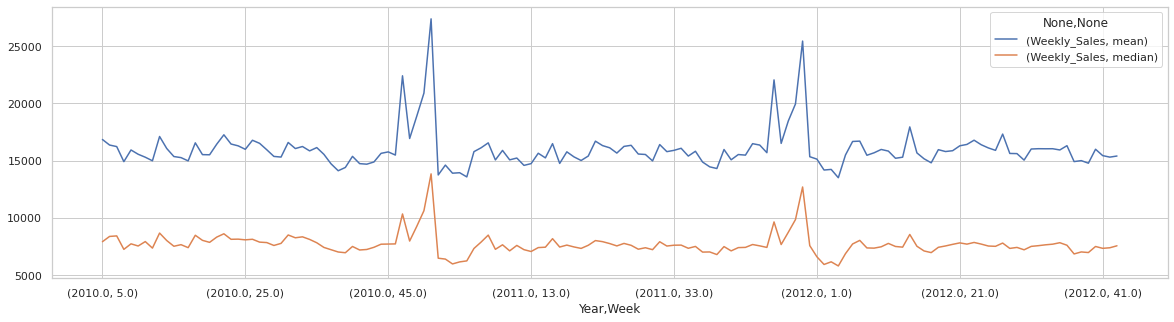

In [ ]:
weekly_sales = features_modified.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = features_modified.loc[train['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = features_modified.loc[train['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = features_modified.loc[train['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales.plot(figsize=(20,5))

The data is grouped by week but separately for each year, in order to identify patterns in weekly sales over the years. As a result, a similar pattern can be seen over the years, with a significant increase in sales in weeks 51 and 47 (Christmas and Thanksgiving). The Superbowl (week 6) and LaborDay holidays (week 36) however have a little impact on increased sales volume.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


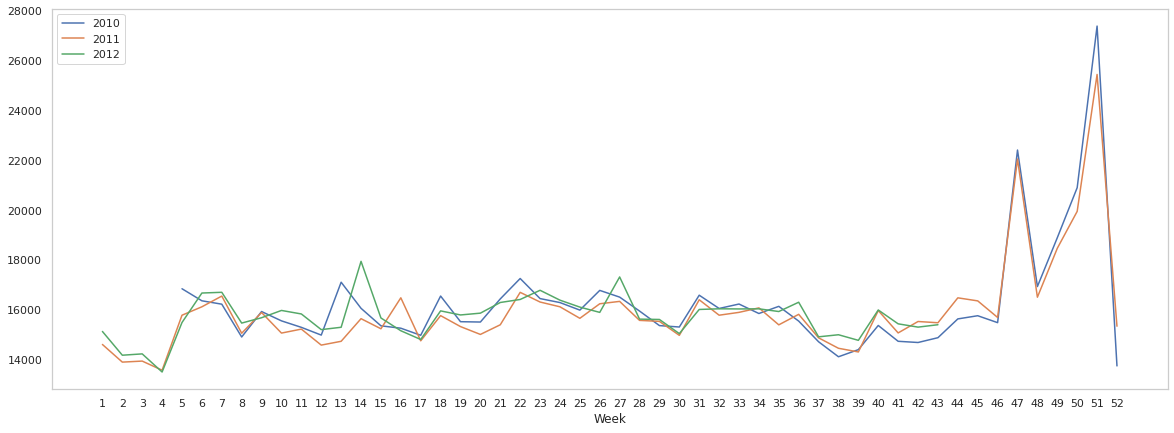

In [ ]:
plt.figure(figsize=(20, 7))

sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()

### Start coding Model below:

# Modelling

In [ ]:
train_data_all = features_modified.drop(['Date'],axis=1)
train_data_all

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1.0,1.0,24924.50,0.0,42.31,2.572,-3.779052e+04,1.548470e+06,2.860881e+06,9.726897e+05,-8.048164e+05,211.096358,8.106,3.0,151315.0,5.0,2.0,2010.0
1,1.0,2.0,50605.27,0.0,42.31,2.572,-1.171117e+06,-1.289255e+06,-6.664306e+05,6.771782e+05,2.900822e+06,211.096358,8.106,3.0,151315.0,5.0,2.0,2010.0
2,1.0,3.0,13740.12,0.0,42.31,2.572,5.165332e+06,-1.144698e+06,-1.033715e+06,1.664580e+06,-1.823560e+06,211.096358,8.106,3.0,151315.0,5.0,2.0,2010.0
3,1.0,4.0,39954.04,0.0,42.31,2.572,1.782528e+06,-3.304684e+06,1.429181e+06,4.357675e+06,1.335146e+06,211.096358,8.106,3.0,151315.0,5.0,2.0,2010.0
4,1.0,5.0,32229.38,0.0,42.31,2.572,-2.628623e+06,2.212122e+06,8.136702e+06,-5.625980e+06,2.117590e+06,211.096358,8.106,3.0,151315.0,5.0,2.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45.0,93.0,2487.80,0.0,58.85,3.882,4.018910e+03,5.808000e+01,1.000000e+02,2.119400e+02,8.583300e+02,192.308899,8.667,2.0,118221.0,43.0,10.0,2012.0
421566,45.0,94.0,5203.31,0.0,58.85,3.882,4.018910e+03,5.808000e+01,1.000000e+02,2.119400e+02,8.583300e+02,192.308899,8.667,2.0,118221.0,43.0,10.0,2012.0
421567,45.0,95.0,56017.47,0.0,58.85,3.882,4.018910e+03,5.808000e+01,1.000000e+02,2.119400e+02,8.583300e+02,192.308899,8.667,2.0,118221.0,43.0,10.0,2012.0
421568,45.0,97.0,6817.48,0.0,58.85,3.882,4.018910e+03,5.808000e+01,1.000000e+02,2.119400e+02,8.583300e+02,192.308899,8.667,2.0,118221.0,43.0,10.0,2012.0


In [ ]:
from sklearn.model_selection import train_test_split
train_all_y = train_data_all.loc[:, ['Weekly_Sales']]
train_all_x = train_data_all.drop(['Weekly_Sales'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(train_all_x, train_all_y, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)

(337256, 17)
(84314, 17)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<h2>Linear Regression</h2>

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  14580.244582560386
MSE:  479314233.1627902
RMSE:  21893.2462911006
R^2: 0.08460632412404667


<h2>KNN</h2>

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
from sklearn import metrics

# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE
# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  15456.492374409943
MSE:  559652000.6083946
RMSE:  23656.965160569405
R^2: -0.06882263576399117


<h2>Decision Tree Regressor</h2>

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE
# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  2023.3573688829856
MSE:  31704632.696291383
RMSE:  5630.686698466839
R^2: 0.9394505352477228


<h2>Random Forest Regressor</h2>

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE
# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  1494.4698422776764
MSE:  15030961.534401089
RMSE:  3876.978402622471
R^2: 0.971293889939103


<h2>Extra Trees Regressor</h2>

In [ ]:
etr_random_best = ExtraTreesRegressor(bootstrap=False, criterion="mse", max_depth=None,
                                      max_features="auto", max_leaf_nodes=None,
                                      min_impurity_decrease=0.0, min_impurity_split=None,
                                      min_samples_leaf=2, min_samples_split=5,
                                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=30,
                                      oob_score=False, random_state=None, warm_start=False)
etr_random_best.fit(x_train, y_train)
y_pred = etr_random_best.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  1458.1956399993423
MSE:  16007887.169331798
RMSE:  4000.9857746975053
R^2: 0.9694281586794329


<h2>XGBoost</h2>

In [ ]:
xg = XGBRegressor()
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)

[15:10:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  6885.182538032777
MSE:  138284138.1091024
RMSE:  11759.427626764085
R^2: 0.7359051395913019


<h2>Ridge</h2>

In [ ]:
rid = Ridge()
rid.fit(x_train, y_train)
y_pred = rid.predict(x_test)

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  14580.244040257217
MSE:  479314232.4667148
RMSE:  21893.246275203564
R^2: 0.0846063254534104


<h2>Lasso</h2>

In [ ]:
las = Lasso()
las.fit(x_train, y_train)
y_pred = las.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52260406358761.31, tolerance: 17329587939.550426
  positive)


In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  14580.119994306218
MSE:  479312983.0741442
RMSE:  21893.217741440938
R^2: 0.08460871154165639


In [ ]:
y_pred = etr_random_best.predict(test_modified)
pred = pd.DataFrame(y_pred.astype(str))
pred["Weekly_Sales"] = pd.DataFrame(y_pred.astype(str))
pred.head(3)

,0,Weekly_Sales
0,30181.21138333333,30181.21138333333
1,45131.705908333315,45131.705908333315
2,10994.77314,10994.77314


In [ ]:
Id = pd.DataFrame(df_test[["Store", "Dept","Date"]])
Id.head(3)

,Store,Dept,Date
0,1,1,1351814400000000000
1,1,2,1351814400000000000
2,1,3,1351814400000000000


In [ ]:
Id["Id"] = Id["Store"].astype(str) + "_" + Id["Dept"].astype(str) + "_" + Id["Date"].astype(str)
Id.head(3)

,Store,Dept,Date,Id
0,1,1,1351814400000000000,1_1_1351814400000000000
1,1,2,1351814400000000000,1_2_1351814400000000000
2,1,3,1351814400000000000,1_3_1351814400000000000


In [ ]:
Id = pd.DataFrame(Id["Id"])
Id.head(3)

,Id
0,1_1_1351814400000000000
1,1_2_1351814400000000000
2,1_3_1351814400000000000


In [ ]:
predictions = pd.concat([Id,pred["Weekly_Sales"]], axis = 1)

In [ ]:
predictions.head(3)
predictions.shape

(115064, 2)

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Assignment_DM')
predictions.to_csv("Weekly_Sales_Prediction.csv", index=False)